In [1]:
import json
import pandas as pd

f = open('./review.json')
reviews = f.readlines()
num_reviews = len(reviews)

# generate rating list
review_user_list = list()
review_item_list = list()
review_rating_list = list()

i = 0
for review in reviews:
    review = json.loads(review)
    user = review['user_id']
    item = review['business_id']
    rating = review['stars']
    review_user_list.append(user)
    review_item_list.append(item)
    review_rating_list.append(rating)
    i += 1
    if i % 500000 == 0:
        print(str(i) + '/' + str(num_reviews))
f.close()
# # convert the user and movie str id to int id 
# for review in reviews:
#     review = json.loads(review)
#     user = review['user_id']
#     if user not in user_dict:
#         u_idx = len(user_dict.keys())
#         user_dict[user] = u_idx
#     item = review['business_id']
#     if item not in item_dict:
#         i_idx = len(item_dict.keys())
#         item_dict[item] = i_idx


500000/5261669
1000000/5261669
1500000/5261669
2000000/5261669
2500000/5261669
3000000/5261669
3500000/5261669
4000000/5261669
4500000/5261669
5000000/5261669


In [2]:
# generate rating dataframe
d = {'user_id': review_user_list, 'item_id': review_item_list, 'rating': review_rating_list}
rating_df = pd.DataFrame(data = d)
item_list = rating_df['item_id'].unique()
user_list = rating_df['user_id'].unique()

In [3]:
# load category information and find the restaurants
f = open('./business.json')
businesses = f.readlines()
num_bussinesses = len(businesses)
item_not_restaurant_list = list()

i = 0
for business in businesses:
    business = json.loads(business)
    item = business['business_id']
    categories = business['categories']
    attributes = business['attributes']
    if (not 'Restaurants' in categories) or (not 'RestaurantsPriceRange2' in attributes) \
        or (not 'RestaurantsTakeOut' in attributes) or (not 'RestaurantsDelivery' in attributes)\
        or (not 'RestaurantsAttire' in attributes) or (not 'RestaurantsGoodForGroups' in attributes)\
        or (not 'RestaurantsReservations' in attributes) or (not 'RestaurantsDelivery' in attributes)\
        or (not 'RestaurantsTableService' in attributes) or (not 'RestaurantsTableService' in attributes):
        item_not_restaurant_list.append(item)

    i += 1
    if i % 10000 == 0:
        print(str(i) + '/' + str(num_bussinesses))
f.close()

10000/174567
20000/174567
30000/174567
40000/174567
50000/174567
60000/174567
70000/174567
80000/174567
90000/174567
100000/174567
110000/174567
120000/174567
130000/174567
140000/174567
150000/174567
160000/174567
170000/174567


In [4]:
rating_df.reset_index(drop=True, inplace=True)
rating_df.head()

,item_id,rating,user_id
0,0W4lkclzZThpx3V65bVgig,5,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,5,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,5,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,5,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,4,bv2nCi5Qv5vroFiqKGopiw


In [5]:
import copy
df = copy.copy(rating_df)
df['r'] = True
len(item_not_restaurant_list)

137185

In [6]:
# delete businesses not restaurants from the data frame
l = len(df)
i = 0
item_not_restaurant_set = set(item_not_restaurant_list)
for r in range(l):
    if df.at[r, 'item_id'] in item_not_restaurant_set:
        df.at[r, 'r'] = False
    if i % 500000 == 0:
        print(str(i) + '/' + str(l))
    i += 1

0/5261669
500000/5261669
1000000/5261669
1500000/5261669
2000000/5261669
2500000/5261669
3000000/5261669
3500000/5261669
4000000/5261669
4500000/5261669
5000000/5261669


In [7]:
rdf = copy.copy(df)
rdf.drop(rdf.index[rdf['r'] == False], inplace=True)
ritem_list = rdf['item_id'].unique()
ruser_list = rdf['user_id'].unique()
print('item num = ' + str(len(ritem_list)))
print('user num = ' + str(len(ruser_list)))

item num = 37382
user num = 870790


In [8]:
# iteratively remove items and users with less than 5 reviews

rdf['user_freq'] = rdf.groupby('user_id')['user_id'].transform('count')
rdf.drop(rdf.index[rdf['user_freq'] <= 5], inplace=True)
rdf['item_freq'] = rdf.groupby('item_id')['item_id'].transform('count')
rdf.drop(rdf.index[rdf['item_freq'] <= 5], inplace=True)
rdf['user_freq'] = rdf.groupby('user_id')['user_id'].transform('count')
rdf['user_id'].value_counts()

CxDOIDnH8gp9KXzpBHJYXw    1676
bLbSNkLggFnqwNNzzq-Ijw    1201
d_TBs6J3twMy9GChqUEXkg     866
cMEtAiW60I5wE_vLfTxoJQ     842
DK57YibC5ShBmqQl97CKog     818
ELcQDlf69kb-ihJfxZyL0A     793
PKEzKWv_FktMm2mGPjwd0Q     780
UYcmGbelzRa0Q6JqzLoguw     630
U4INQZOPSUaj8hMjLlZ3KA     596
QJI9OSEn6ujRCtrX06vs1w     560
C2C0GPKvzWWnP57Os9eQ0w     522
62GNFh5FySkA3MbrQmnqvg     509
V-BbqKqO8anwplGRx9Q5aQ     507
iDlkZO2iILS8Jwfdy7DP9A     500
2e5V6M4GNufEnbGJpVdCjw     493
kjeX2RXvW7RhBbD2QLd5jA     488
n86B7IkbU20AkxlFX_5aew     467
PeLGa5vUR8_mcsn-fn42Jg     463
rCWrxuRC8_pfagpchtHp6A     457
N3oNEwh0qgPqPP3Em6wJXw     457
tH0uKD-vNwMoEc3Xk3Cbdg     456
pMefTWo6gMdx8WhYSA2u3w     456
WeVkkF5L39888IPPlRhNpg     455
bhJ6ivAuSpgXP4JiKWjSZQ     450
EiP1OFgs-XGcKZux0OKWIA     439
Wu0yySWcHQ5tZ_59HNiamg     435
dIIKEfOgo0KqUfGQvGikPg     426
Q4Qfu-3vYtL1LRm2X1b0Gg     423
ffPY_bHX8vLebHu8LBEqfg     417
3nDUQBjKyVor5wV0reJChg     417
                          ... 
3zlUmUpfvvK_pQdYLjTVNg       3
lRokuJxu

In [9]:
rdf.drop(rdf.index[rdf['user_freq'] <= 5], inplace=True)
rdf['item_freq'] = rdf.groupby('item_id')['item_id'].transform('count')
rdf.drop(rdf.index[rdf['item_freq'] <= 5], inplace=True)
rdf['user_freq'] = rdf.groupby('user_id')['user_id'].transform('count')
rdf['user_id'].value_counts()

CxDOIDnH8gp9KXzpBHJYXw    1676
bLbSNkLggFnqwNNzzq-Ijw    1201
d_TBs6J3twMy9GChqUEXkg     866
cMEtAiW60I5wE_vLfTxoJQ     842
DK57YibC5ShBmqQl97CKog     818
ELcQDlf69kb-ihJfxZyL0A     793
PKEzKWv_FktMm2mGPjwd0Q     780
UYcmGbelzRa0Q6JqzLoguw     630
U4INQZOPSUaj8hMjLlZ3KA     596
QJI9OSEn6ujRCtrX06vs1w     560
C2C0GPKvzWWnP57Os9eQ0w     522
62GNFh5FySkA3MbrQmnqvg     508
V-BbqKqO8anwplGRx9Q5aQ     507
iDlkZO2iILS8Jwfdy7DP9A     499
2e5V6M4GNufEnbGJpVdCjw     493
kjeX2RXvW7RhBbD2QLd5jA     488
n86B7IkbU20AkxlFX_5aew     467
PeLGa5vUR8_mcsn-fn42Jg     463
N3oNEwh0qgPqPP3Em6wJXw     457
pMefTWo6gMdx8WhYSA2u3w     456
tH0uKD-vNwMoEc3Xk3Cbdg     456
rCWrxuRC8_pfagpchtHp6A     456
WeVkkF5L39888IPPlRhNpg     455
bhJ6ivAuSpgXP4JiKWjSZQ     450
EiP1OFgs-XGcKZux0OKWIA     438
Wu0yySWcHQ5tZ_59HNiamg     435
dIIKEfOgo0KqUfGQvGikPg     426
Q4Qfu-3vYtL1LRm2X1b0Gg     423
3nDUQBjKyVor5wV0reJChg     417
ffPY_bHX8vLebHu8LBEqfg     417
                          ... 
FjYkBL5rxhN7iPxQ0fdJdg       5
eFd_0bwc

In [10]:
rdf.drop(rdf.index[rdf['user_freq'] <= 5], inplace=True)
rdf['item_freq'] = rdf.groupby('item_id')['item_id'].transform('count')
rdf.drop(rdf.index[rdf['item_freq'] <= 5], inplace=True)
rdf['user_freq'] = rdf.groupby('user_id')['user_id'].transform('count')
rdf['user_id'].value_counts()

CxDOIDnH8gp9KXzpBHJYXw    1676
bLbSNkLggFnqwNNzzq-Ijw    1201
d_TBs6J3twMy9GChqUEXkg     866
cMEtAiW60I5wE_vLfTxoJQ     842
DK57YibC5ShBmqQl97CKog     818
ELcQDlf69kb-ihJfxZyL0A     793
PKEzKWv_FktMm2mGPjwd0Q     780
UYcmGbelzRa0Q6JqzLoguw     630
U4INQZOPSUaj8hMjLlZ3KA     596
QJI9OSEn6ujRCtrX06vs1w     560
C2C0GPKvzWWnP57Os9eQ0w     522
62GNFh5FySkA3MbrQmnqvg     508
V-BbqKqO8anwplGRx9Q5aQ     507
iDlkZO2iILS8Jwfdy7DP9A     499
2e5V6M4GNufEnbGJpVdCjw     493
kjeX2RXvW7RhBbD2QLd5jA     488
n86B7IkbU20AkxlFX_5aew     467
PeLGa5vUR8_mcsn-fn42Jg     463
N3oNEwh0qgPqPP3Em6wJXw     457
rCWrxuRC8_pfagpchtHp6A     456
pMefTWo6gMdx8WhYSA2u3w     456
tH0uKD-vNwMoEc3Xk3Cbdg     456
WeVkkF5L39888IPPlRhNpg     455
bhJ6ivAuSpgXP4JiKWjSZQ     450
EiP1OFgs-XGcKZux0OKWIA     438
Wu0yySWcHQ5tZ_59HNiamg     435
dIIKEfOgo0KqUfGQvGikPg     426
Q4Qfu-3vYtL1LRm2X1b0Gg     423
3nDUQBjKyVor5wV0reJChg     417
ffPY_bHX8vLebHu8LBEqfg     417
                          ... 
y0yARcgq3otaki8vyoAGwg       6
bt1Tb9lb

In [12]:
rdf.drop(rdf.index[rdf['user_freq'] <= 5], inplace=True)
rdf['item_freq'] = rdf.groupby('item_id')['item_id'].transform('count')
rdf.drop(rdf.index[rdf['item_freq'] <= 5], inplace=True)
rdf['user_freq'] = rdf.groupby('user_id')['user_id'].transform('count')
rdf['user_id'].value_counts()

CxDOIDnH8gp9KXzpBHJYXw    1676
bLbSNkLggFnqwNNzzq-Ijw    1201
d_TBs6J3twMy9GChqUEXkg     866
cMEtAiW60I5wE_vLfTxoJQ     842
DK57YibC5ShBmqQl97CKog     818
ELcQDlf69kb-ihJfxZyL0A     793
PKEzKWv_FktMm2mGPjwd0Q     780
UYcmGbelzRa0Q6JqzLoguw     630
U4INQZOPSUaj8hMjLlZ3KA     596
QJI9OSEn6ujRCtrX06vs1w     560
C2C0GPKvzWWnP57Os9eQ0w     522
62GNFh5FySkA3MbrQmnqvg     508
V-BbqKqO8anwplGRx9Q5aQ     507
iDlkZO2iILS8Jwfdy7DP9A     499
2e5V6M4GNufEnbGJpVdCjw     493
kjeX2RXvW7RhBbD2QLd5jA     488
n86B7IkbU20AkxlFX_5aew     467
PeLGa5vUR8_mcsn-fn42Jg     463
N3oNEwh0qgPqPP3Em6wJXw     457
tH0uKD-vNwMoEc3Xk3Cbdg     456
rCWrxuRC8_pfagpchtHp6A     456
pMefTWo6gMdx8WhYSA2u3w     456
WeVkkF5L39888IPPlRhNpg     455
bhJ6ivAuSpgXP4JiKWjSZQ     450
EiP1OFgs-XGcKZux0OKWIA     438
Wu0yySWcHQ5tZ_59HNiamg     435
dIIKEfOgo0KqUfGQvGikPg     426
Q4Qfu-3vYtL1LRm2X1b0Gg     423
ffPY_bHX8vLebHu8LBEqfg     417
3nDUQBjKyVor5wV0reJChg     417
                          ... 
jL6MqoXd-8N59qh-3lnojA       6
FwzqEPhO

In [13]:
rdf['item_id'].value_counts()

4JNXUYY8wbaaDmk3BPzlWw    2817
RESDUcs7fIiihp38-d6_6g    2521
K7lWdNUhCbcnEvI0NhGewg    2399
DkYS3arLOhA8si5uUEmHOw    2208
iCQpiavjjPzJ5_3gPD5Ebg    1870
cYwJA2A6I12KNkm2rtXd5g    1783
KskYqH1Bi7Z_61pH6Om8pg    1732
2weQS-RnoOBhb1KsHKyoSQ    1729
eoHdUeQDNgQ6WYEnP2aiRw    1696
7sPNbCx7vGAaH7SbNPZ6oA    1625
f4x1YBxkLrZg652xt2KR5g    1612
ujHiaprwCQ5ewziu0Vi9rw    1561
rcaPajgKOJC2vo_l3xa42A    1500
g8OnV26ywJlZpezdBnOWUQ    1499
P7pxQFqr7yBKMMI2J51udw    1380
yfxDa8RFOvJPQh0rNtakHA    1319
UPIYuRaZvknINOd1w8kqRQ    1307
Cni2l-VKG_pdospJ6xliXQ    1260
JzOp695tclcNCNMuBl7oxA    1212
XXW_OFaYQkkGOGniujZFHg    1190
XZbuPXdyA0ZtTu3AzqtQhg    1188
NvKNe9DnQavC9GstglcBJQ    1173
pSQFynH1VxkfSmehRXlZWw    1166
QJatAcxYgK1Zp9BRZMAx7g    1120
9a3DrZvpYxVs3k_qwlCNSw    1109
LNGBEEelQx4zbfWnlc66cw    1096
fL-b760btOaGa85OJ9ut3w    1075
OgJ0KxwJcJ9R5bUK0ixCbg    1072
igHYkXZMLAc9UdV5VnR_AA    1071
0FUtlsQrJI7LhqDPxLumEw     995
                          ... 
sAU0FbmsQwcwk3uvvvtIgw       6
tcclqqE4

In [14]:
#  final user and item list

ritem_list = rdf['item_id'].unique()
ruser_list = rdf['user_id'].unique()
print('item num = ' + str(len(ritem_list)))
print('user num = ' + str(len(ruser_list)))

item num = 31025
user num = 102612


In [15]:
# get the genres information of each item
f = open('./business.json')
businesses = f.readlines()
num_bussinesses = len(businesses)

item_genre_dict = dict()

i = 0
for business in businesses:
    business = json.loads(business)
    item = business['business_id']
    categories = business['categories']
    if item in ritem_list:
        item_genre_dict[item] = categories
    i += 1
    if i % 10000 == 0:
        print(str(i) + '/' + str(num_bussinesses))
f.close()

10000/174567
20000/174567
30000/174567
40000/174567
50000/174567
60000/174567
70000/174567
80000/174567
90000/174567
100000/174567
110000/174567
120000/174567
130000/174567
140000/174567
150000/174567
160000/174567
170000/174567


In [17]:
import pickle
with open("rdf.pkl", "wb") as f:
    pickle.dump(rdf, f, pickle.HIGHEST_PROTOCOL)
with open("ruser_list.pkl", "wb") as f:
    pickle.dump(ruser_list, f, pickle.HIGHEST_PROTOCOL)
with open("ritem_list.pkl", "wb") as f:
    pickle.dump(ritem_list, f, pickle.HIGHEST_PROTOCOL)
with open("item_genre_dict.pkl", "wb") as f:
    pickle.dump(item_genre_dict, f, pickle.HIGHEST_PROTOCOL)

In [16]:
# count the number for each genre and sort
import operator
genre_count = dict()
for l in item_genre_dict:
    for g in item_genre_dict[l]:
        if not g in genre_count:
            genre_count[g] = 1
        else:
            genre_count[g] += 1

genre_count_sorted = sorted(genre_count.items(), key=operator.itemgetter(1), reverse=True)
genre_count_sorted

{u'Acai Bowls': 21,
 u'Active Life': 72,
 u'Adult Education': 1,
 u'Adult Entertainment': 5,
 u'Advertising': 1,
 u'Afghan': 52,
 u'African': 71,
 u'Airports': 1,
 u'American (New)': 3022,
 u'American (Traditional)': 4340,
 u'Amusement Parks': 4,
 u'Animal Shelters': 2,
 u'Antiques': 3,
 u'Appliances': 4,
 u'Appliances & Repair': 1,
 u'Arabian': 28,
 u'Arcades': 41,
 u'Argentine': 19,
 u'Armenian': 6,
 u'Art Galleries': 9,
 u'Arts & Crafts': 5,
 u'Arts & Entertainment': 409,
 u'Asian Fusion': 1217,
 u'Australian': 4,
 u'Austrian': 6,
 u'Auto Repair': 1,
 u'Automotive': 12,
 u'Baby Gear & Furniture': 1,
 u'Bagels': 245,
 u'Bakeries': 673,
 u'Bangladeshi': 8,
 u'Bar Crawl': 1,
 u'Barbeque': 995,
 u'Bars': 4958,
 u'Bartenders': 3,
 u'Basque': 20,
 u'Bavarian': 7,
 u'Beach Bars': 1,
 u'Beaches': 1,
 u'Beauty & Spas': 11,
 u'Bed & Breakfast': 37,
 u'Beer': 554,
 u'Beer Bar': 165,
 u'Beer Garden': 28,
 u'Beer Gardens': 35,
 u'Beer Hall': 2,
 u'Belgian': 34,
 u'Beverage Store': 6,
 u'Bike Ren

In [4]:
##########################################################################
#
# start from here!!!!
#
##########################################################################
import pickle

rdf = pickle.load(open('rdf.pkl'))
ruser_list = pickle.load(open('ruser_list.pkl'))
ritem_list = pickle.load(open('ritem_list.pkl'))
item_genre_dict = pickle.load(open('item_genre_dict.pkl'))

In [2]:
# key_genre = ['American (Traditional)', 'American (New)', 'Mexican', 'Italian', 'Chinese',
#                    'Japanese', 'Mediterranean', 'Thai', 'Indian', 'Vietnamese',
#                    'Middle Eastern', 'Greek', 'French', 'Korean']
key_genre = ['American (Traditional)', 'American (New)', 'Mexican', 'Italian', 'Chinese'
             , 'Thai', 'Vietnamese', 'Greek', 'French', 'Korean']

# filter the items with key genres
key_genre_item = dict()
for k in key_genre:
    key_genre_item[k] = list()
for l in item_genre_dict:
    for g in item_genre_dict[l]:
        if g in key_genre:
            key_genre_item[g].append(l)

In [3]:
# count how many items each genre has
for k in key_genre:
    print(k)
    print(len(key_genre_item[k]))

American (Traditional)
4340
American (New)
3022
Mexican
2854
Italian
2761
Chinese
2467
Thai
881
Vietnamese
617
Greek
590
French
561
Korean
515


In [5]:
# generate the rating list for each key genre
rdf.reset_index(drop=True, inplace=True)
key_genre_rating = dict()
for k in key_genre:
    key_genre_rating[k] = list()
for r in range(len(rdf)):
    item = rdf.at[r, 'item_id']
    gl = item_genre_dict[item]
    for k in key_genre:
        if k in gl:
            key_genre_rating[k].append(rdf.at[r, 'rating'])

American (Traditional):3.5957992406404524
American (New):3.7627762819883945
Mexican:3.666679055477093
Italian:3.7666149964652393
Chinese:3.5224458064399484
Thai:3.803854894656802
Vietnamese:3.7583945905796172
Greek:3.8933882103027084
French:3.981335555892307
Korean:3.7273136301003906


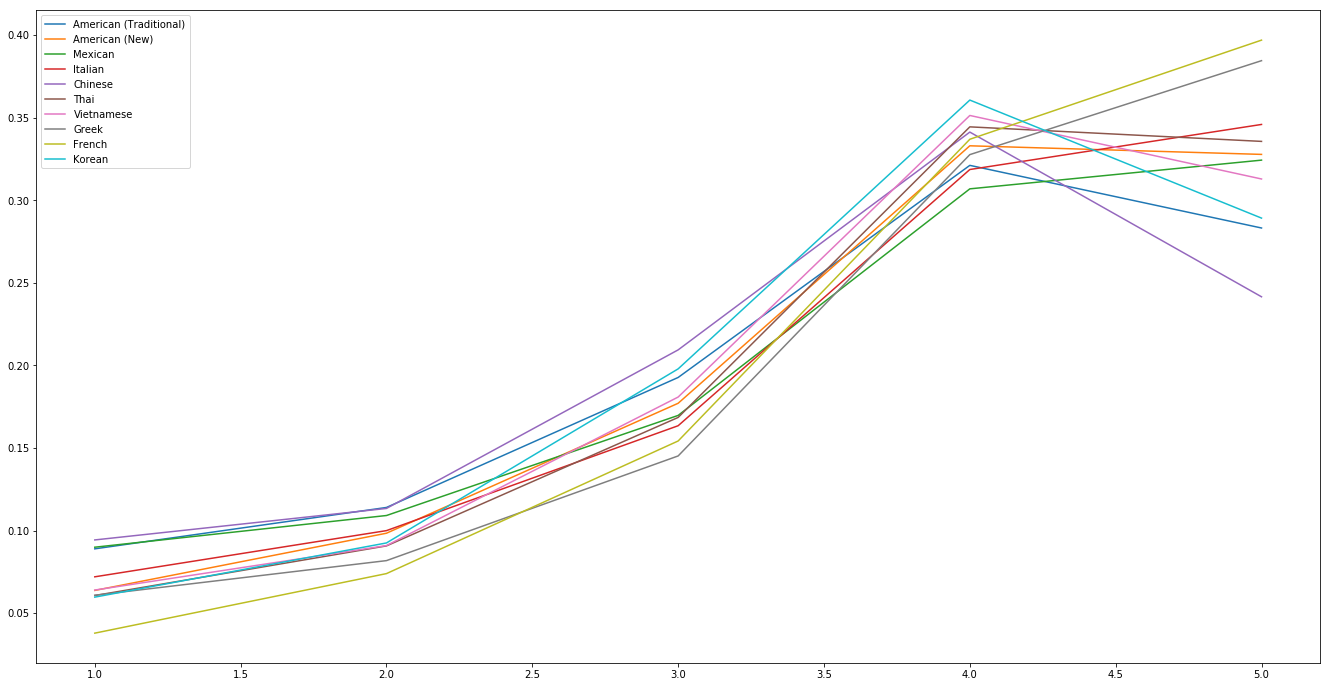

In [8]:
import numpy as np
from matplotlib.pyplot import *

# generate the rating distribution for each genre
key_genre_rating_count = dict()
for k in key_genre:
    key_genre_rating_count[k] = np.zeros(5)
for k in key_genre_rating:
    rl = key_genre_rating[k]
    for r in rl:
        key_genre_rating_count[k][int(r - 1)] += 1
        
# calculate the weighted average of rating for each genre, and plot rating distribution
ks_list = list()
r_dis = np.array(range(1,6))
rating_array = np.array([])
for k in key_genre:
    rl = key_genre_rating_count[k]
    rl = (rl * 1.0) / np.sum(rl)
    rating_array = np.append(rating_array, rl)
    ks = np.sum(np.multiply(rl, r_dis))
    print(k + ':' + str(ks))
    ks_list.append([k, ks])
    csum = np.cumsum(rl)
    plot(np.array(range(1, 6)), rl)
legend(key_genre)
gcf().set_size_inches(23,12)
rating_array = rating_array.reshape((len(key_genre), 5))

In [9]:
from operator import itemgetter
print(sorted(ks_list, key=itemgetter(1)))
print('std of rating mean: ' + str(np.std([i[1] for i in ks_list])))

std_list = np.std(rating_array, axis=0)
print('std of each rating level: ' + str(std_list))
print('sum of std list: ' + str(np.sum(std_list)))

[['Chinese', 3.5224458064399484], ['American (Traditional)', 3.5957992406404524], ['Mexican', 3.666679055477093], ['Korean', 3.7273136301003906], ['Vietnamese', 3.7583945905796172], ['American (New)', 3.7627762819883945], ['Italian', 3.7666149964652393], ['Thai', 3.803854894656802], ['Greek', 3.8933882103027084], ['French', 3.981335555892307]]
std of rating mean: 0.12667141691980383
std of each rating level: [0.01652276 0.01253888 0.01891116 0.01536493 0.04406622]
sum of std list: 0.10740395833268954
